In [10]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
#import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [11]:
#device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [12]:
#hyper parameters
input_size = 784 #28X28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size=100
learning_rate = 0.001


In [13]:
#MNIST data
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset  = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

In [14]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size,
                                          shuffle=False)

In [15]:
examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


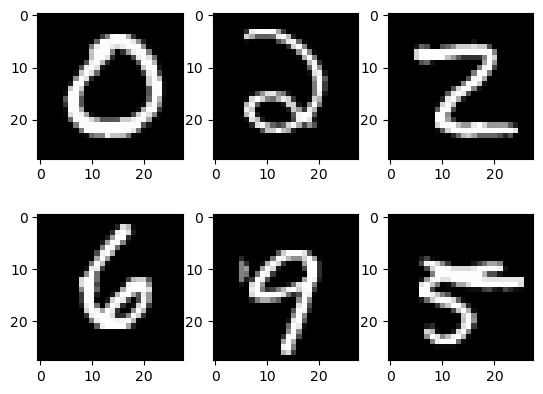

In [18]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

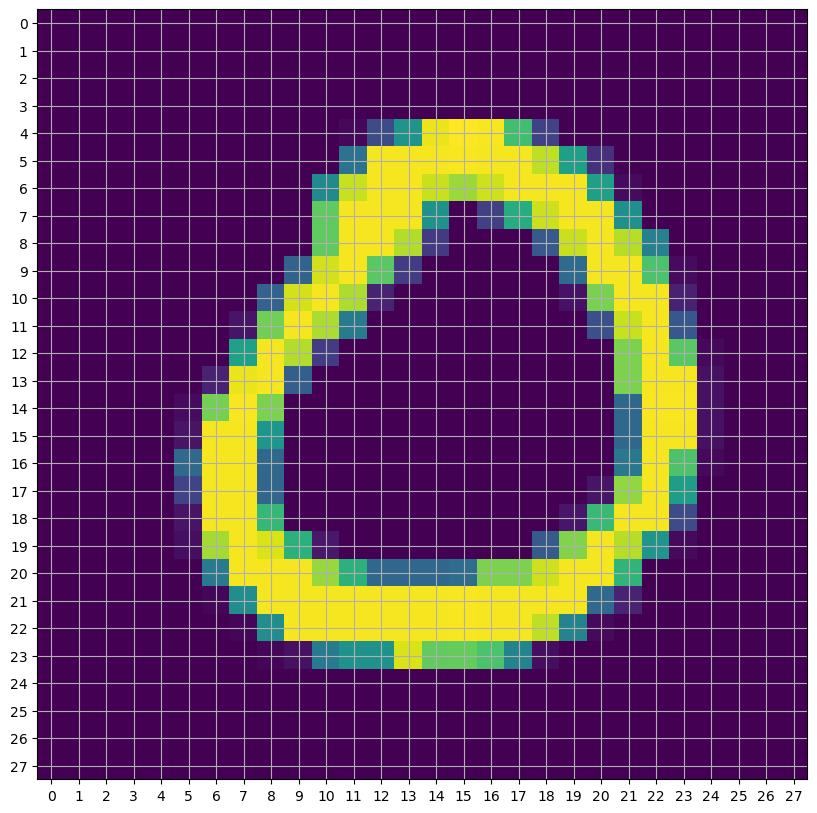

In [35]:
plt.figure(figsize=(15,10))
plt.imshow(samples[0][0])
plt.xticks(range(len(samples[0][0])))
plt.yticks(range(len(samples[0][0])))
plt.grid()

In [36]:
#len(samples[0][0])

In [37]:
#samples[0][0].shape

In [38]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes): #num_classes is output size
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        
        self.l2=nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out=self.l2(out)
        #we will use cross entropy loss and hence no softmax layer
        return out
    
    

In [39]:
model = NeuralNet(input_size, hidden_size, num_classes)

In [42]:
#loss and optimizer
criterion = nn.CrossEntropyLoss()  #hence no softmax
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate )

In [44]:
#image shame
samples[0][0].shape

torch.Size([28, 28])

In [45]:
#training loop
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        #100, 1, 28, 28
        #100, 784
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        
        #forward
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        #backwards
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1)%100 == 0:
            print(f'epoch {epoch+1} / {num_epochs}, step={i+1} / {n_total_steps}, loss={loss.item():.4f}')

epoch 1 / 2, step=100 / 600, loss=0.2300
epoch 1 / 2, step=200 / 600, loss=0.2705
epoch 1 / 2, step=300 / 600, loss=0.4262
epoch 1 / 2, step=400 / 600, loss=0.3531
epoch 1 / 2, step=500 / 600, loss=0.2999
epoch 1 / 2, step=600 / 600, loss=0.3168
epoch 2 / 2, step=100 / 600, loss=0.2003
epoch 2 / 2, step=200 / 600, loss=0.0657
epoch 2 / 2, step=300 / 600, loss=0.0881
epoch 2 / 2, step=400 / 600, loss=0.0824
epoch 2 / 2, step=500 / 600, loss=0.0947
epoch 2 / 2, step=600 / 600, loss=0.1110


In [47]:
#test loop
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        
        outputs=model(images)
        _, predictions = torch.max(outputs, 1) #torch.max returns value and index, we are not interested in actual value and hence _
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()

In [48]:
acc = 100*n_correct/n_samples
print(f'accuracy = {acc}')

accuracy = 95.38
